## Week2 Fundamentals of Machine learning

- Rule based ML, Decision Tree, Linear Regression을 배우자.

### Rule Based Learning

- 한계점을 중점적으로 보자.

#### - Definition of ML

- learn from experience E withe respect to some class of tasks T, and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E (supervised)

- More experience $\to$ more trial, more prior knowledge.

- Imagine a perfect world with
    - No observation errors, No inconsistent observations (완벽한 관측, 일관적인 관찰들)
    - No stochastic elements in the system we observe (랜덤 effect가 없는
    - Full information in the observations to regenerate the system (완벽한 설명이 있는 정보들임을 가정)

#### - Function Approximation

- The effort of producing a better approximate function.
    - ML은 F.A를 얼마나 잘하느냐는지에 대한 문제이다.


- Instance X, Training Dataset D, 
- Hypotheses H  
    - ex) $ h_{i} $: [Sunny, Warm, ?, ?, ?, Same] $\to$ Yes
    - General하게 Specific하게 Hypotheses 설정 할 수 있다.
- Target Function c : 목표로 하는 함수

### 1) Find-S Algorithm

<pre><code>
For instance x in D
    if x is positive
        For feature f in O
            If fi in h == fi in x
                Do nothing
            Else
                fi in h = fi in h ∪ fi in x
Return h
</code></pre>
- Any problems?
    - Many possible hs, and can’t determine the converge

#### - Version Space

- General Boundary, G: Is the set of the maximally general hypotheses of the version space
- Specific Boundary, S: Is the set of the maximally specific hypotheses of the version space
- Every hypothesis, h, satisifies: $ VS_{H,D} = \left\{ h \in H | \exists s \in S, \exists g \in G, g \ge h \ge s  \right\} $
    - where $ x \ge y $ means x is more general or equal to y

#### - Candidate Elimination Algorithm

- Initialize S to maximally specific h in H
- Initialize G to maximally general h in H
- 그리고 점점 좁혀 나간다.

<img  src="./image/W2_RBL.PNG" width="60%">

- 그리고 저 Hypotheses 가운데 하나에 Target Function c 가 있지 않을까
- 문제점
    - General은 만족시키는데 Specific을 못 만족하면 어떻게 해야하는지의 문제점
    - Perfect world에서 만 잘 돌아간다. (Noise)
    

### 2) Decision Tree


- Entropy
    - Uncertainty를 reducing하는 attribute로 check하는 것이 좋다.
    - Uncertainty를 measure하자.
    - Attribute를 어떤 특정 distribution으로 생성된 random variable로 보고 생각해보자.
        - Higer entropy means more uncertainty 
        - $ H(X) = - \sum_{X}P(X=x)log_{b}P(X=x) $
        - 연속함수 일때는 sigma가 적분으로

    - Conditional Entropy
        - 특정 feature에 대한 정보가 있을 때 엔트로피 설정. (given X)
        - $ \begin{matrix} H(Y|X) &=& \sum_{X}P(X=x)log_{b}P(Y|X=x) \\ &=&  \sum_{X}P(X=x) \left\{ - \sum_{Y} P(Y=y|X=x)log_{b}P(Y=y|X=x)  \right\} \end{matrix} $
        - 앞의 $\sum_{X}P(X=x)$는 사전정보의 역할을 함을 알 수 있다.
    
    
- Information Gain
    - feature 말고, 클래스에 대해서 엔트로피를 잴 수 있을 것이다.
    - 클래스 Y에 대한 엔트로피를 측정하고, given feature에 대한 Y에 대한 조건부 엔트로피를 알아보면.
    <img  src="./image/W2_IG.PNG" width="60%">
    - $ IG(Y, A_{i}) = H(Y) - H(Y|A_{i}) $
        - H(Y)는 원래 이정도의ㅣ 레벨이었는데 condition을 줬을 때, 이렇게 바뀌었다.
        - Information Gain이 높은 것을 루트로 트리를 만든다.

- [PRML - Information Theory](https://github.com/NamSahng/Summary/blob/master/Pattern_Recognition%26Machine_Learning/1.6%20Information%20Theory.ipynb) 도 참고 해보자.
    - 미분엔트로피 , 상대 엔트로피(KL-D, Cross) 로 확장 됨.


- 루트를 만드는 방식:
    - ID3, C4.5, CART, CHAID(카이제곱 값이 가장 큰 것으로 나누는) 다양한 방식이 있다.

- ex) ID3 Algorithm
    - Create an initial open node
    - Put instances in the initial node
    - Repeat until no open node
    - Select an open node to split / Select a best variable to split
    - For values of the selected variable
        - Sort instances with the value of the selected variable
        - Put the sorted items under the branch of the value of the variable
        - If the sorted items are all in one class
            - Close the leaf node of the branch
    
- Split stopping Criteria:
    - 나무의 깊이, 리프노드의 레코드의 최소 개수를 지정함으로 루트 만드는 것을 멈출 수 있다.
    
- Pruning the Decision Tree:
    - 테스트 데이터를 활용해 오분류가 높은 가지를 제거하거나, 전문가가 타당성을 검토해 pruning 할 수 있다.
    
    
- Problem of Decision Tree    
<img  src="./image/W2_3.PNG" width="60%">
    - Noise와 Inconsistency에 대한 문제




## Linear Regression

- 위보다 보다 통계적인 방법
- ML에서 Linear Regression이란: Probably Approximately Correct(PAC)한 function을 Learning linear한 형태의 function으로 하는 것.

- Our Hypothesis:
    - $h: f(\hat{x},\theta) = \theta_0 + \sum_{i=1}^n \theta_i x_i = \sum_{i=0}^n \theta_i x_i \to f(\hat{x},\theta) = X\theta$
    - 지금 까지 Hypothesis는 Rule이 었지만 이제 function의 형태로
    - theta를 잘 만들면 되겠다.

- Finding $ \theta $ in Linear Regression
- 현실세계에서는 데이터에 잡음(Noise)이 들어가게 되는데 이를 표현해주기 위해 True function f(x,θ)에 n×1 벡터인 e를 더해준다.
    - $h: f(x,\theta) = \sum_{i=0}^n \theta_i x_i + e \to f=X\theta+e=Y$

- True function $f(x,\theta)$와 가설 $f(\hat{x},\theta)$의 차를 오차(Error)라고 부르는데, 이 오차의 제곱(Squared Error)을 최소화하는 방법으로 매개변수 $ \theta $를 찾을 수 있다.
    - $\hat{\theta} = argmin_{\theta}(f-\hat{f})^{2} = argmin_{\theta}(Y-X\theta)^{2} = argmin_{\theta}(Y-X\theta)^{T}(Y-X\theta) = argmin_{\theta}(\theta^{T}X^{T}X\theta - 2\theta^{T}X^{T}Y + Y^{T}Y) $
        - $ Y^{T}Y $는 세타와 관계가 없는 상수 텀이다. $ \to \hat{\theta} = argmin_{\theta}(\theta^{T}X^{T}X\theta - 2\theta^{T}X^{T}Y ) $
    -  미분을 통해 세타를 구하면. 
        - $ \nabla_{\theta}(\theta^{T}X^{T}X\theta - 2\theta^{T}X^{T}Y) = 0  $
        - $ 2X^{T}X\theta - X^{T}Y = 0 $
        - $ \theta = (X^{T}X)^{-1}X^{T}Y $
    - [최소제곱법](https://github.com/NamSahng/Summary/blob/master/LinearAlgebra%26ItsApplications_LSH/Chapter3.ipynb)


- 이를 하나의 feature에 대해 해보면, 다음과 같으며 featuer 값이 클 때는 잘 못맞 추는 것을 확인할 수 있다.

<img  src="./image/W2_4.PNG" width="45%">

- 근사한 선형회귀 그래프가 True function을 설명하므로 단순회귀가 아닌 x의 고차항으로 이루어진 다항회귀(Polynomial Regression)를 이용할 수 있다.
    - $ h: f(\hat{x},\theta) = \sum_{i=0}^n \sum_{j=1}^m \theta_{i,j} \phi_j(x_i) $
    - 9승 까지 늘린 결과 다음과 같이 나왔다.
    
<img  src="./image/W2_5.PNG" width="45%">

   - 그래도 Better Fitting? 부분은 데이터가 적은데 잘한 것이 맞는지 의문은 아직 많이 남아 있다.


### Linear Regression code

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import csv

%matplotlib inline

# X: Feature variable
# Y: Depedent variable
X = []
Y = []
f = open('./data/W2_X.csv', 'r')
csvReader = csv.reader(f)
for row in csvReader:
    X.append(row)
f.close()  
f = open('./data/W2_Y.csv', 'r')
csvReader = csv.reader(f)
for row in csvReader:
    Y.append(row)
f.close()

X = np.asarray(X, dtype = 'float64')
Y = np.asarray(Y, dtype = 'float64')

In [4]:
# 아래의 예제는 x의 1차항만 고려하는 선형회귀(Linear Regression) 모형

# xTemp: 13개의 Attribute 중 첫 번째 Attribute만 Feature varaible로 활용함 - xTemp[i]  =[1, x(i)]
# theta(θ): 오차의 제곱을 최소화하는 매개변수 값
# Y_est(= xTemp * θ): 위에서 구해진 tehta로 도출된 예측치

xTemp = X[:, 0:2]

# np.linalg.inv 역행렬  
# theta= (X^{T}X)^{-1}X^{T}Y
theta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(xTemp), xTemp)), np.transpose(xTemp)), Y)
Y_est = np.dot(xTemp, theta)

# m0, c0 = argmin |Y - (m0 * xYemp + c0)|^2
# m1, c1 = argmin |Y_est - (m1 * xYemp + c1)|^2
# np.linalg.lstsq: Return the least-squares solution to a linear matrix equation.

m0, c0 = np.linalg.lstsq(xTemp, Y)[0]
m1, c1 = np.linalg.lstsq(xTemp, Y_est)[0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [5]:
# 아래의 예제는 x의 8차항으로 이루어진 다항회귀(Polynomial Regression) 모형

# newX: newX[i] = [1, x(i), x(i)^2, x(i)^3, x(i)^4, x(i)^5, x(i)^6, x(i)^7, x(i)^8]
# newTheta: 오차의 제곱을 최소화하는 매개변수 값
# newY_est(= newX * newθ): 위에서 구해진 newTehta로 도출된 예측치

newX = np.zeros((X.shape[0], 9))
newX[:, 0:2] = X[:, 0:2]

# X의 제곱항을 만들기
for i in range(2, 9):
    newX[:, i] = newX[:, 1] * newX[:, i-1]

newTheta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(newX), newX)), np.transpose(newX)), Y)

newY_est = np.dot(newX, newTheta)

# m2, c2 = argmin |Y_est - (m2 * xYemp + c2)|^2
m2, c2 = np.linalg.lstsq(xTemp, newY_est)[0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


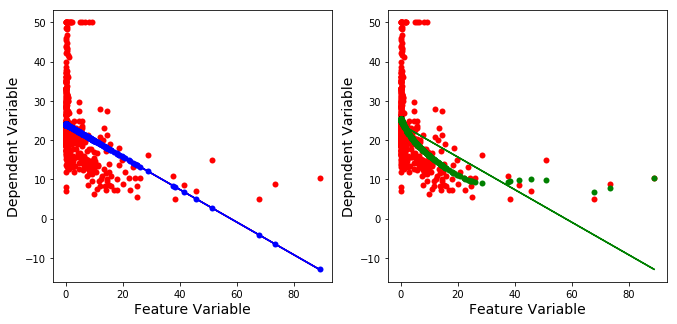

In [7]:
# 결과값을 그래프로 나타냄
# x축은 사용한 Feature Variable의 값이고, y축은 Dependent Variable의 값
plt.figure(1, figsize = (17, 5))

# 그래프 1
ax1 = plt.subplot(1, 3, 1)
plt.plot(X[:, 1], Y, 'ro', markeredgecolor = 'none')
plt.plot(X[:, 1], m0+c0*X[:, 1], 'r-')
plt.plot(X[:, 1], Y_est, 'bo', markeredgecolor = 'none')
plt.plot(X[:, 1], m1+c1*X[:, 1], 'b-')
plt.xlabel('Feature Variable', fontsize = 14)
plt.ylabel('Dependent Variable', fontsize = 14)

# 그래프 2
ax2 = plt.subplot(1, 3, 2, sharey = ax1)
plt.plot(X[:, 1], Y, 'ro', markeredgecolor = 'none')
plt.plot(X[:, 1], newY_est, 'go', markeredgecolor = 'none')
plt.plot(X[:, 1], m2 + c2*X[:, 1], 'g-')
plt.xlabel('Feature Variable', fontsize = 14)
plt.ylabel('Dependent Variable', fontsize = 14)

plt.show()

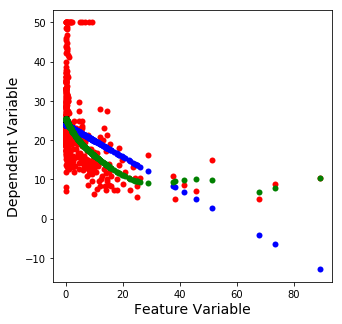

In [11]:
# 그래프 비교
plt.figure(1, figsize = (17, 5))

ax3 = plt.subplot(1, 3, 3, sharey = ax2)
plt.plot(X[:, 1], Y, 'ro', markeredgecolor = 'none')
plt.plot(X[:, 1], Y_est, 'bo', markeredgecolor = 'none')
plt.plot(X[:, 1], newY_est, 'go', markeredgecolor = 'none')
plt.xlabel('Feature Variable', fontsize = 14)
plt.ylabel('Dependent Variable', fontsize = 14)

plt.show()


<br><br>
### Reference:

- 문일철 교수님, 인공지능 및 기계학습 개론Ⅰ, https://www.edwith.org/machinelearning1_17

- 코드 : https://github.com/aailabkaist/Introduction-to-Artificial-Intelligence-Machine-Learning